In [2]:
import sys, os, django
import pandas as pd

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *

from pyparsing import *

q = Query.objects.get(pk=7638)
import lxml.etree as ET
import datetime
import matplotlib.pyplot as plot
import random


In [3]:
def write_d_record(records, d):
    
    record = ET.SubElement(records, 'record')
    
    
    db = ET.SubElement(record,'database')
    db.set('name',"APSIS")
    db.set('path','')
    db.text = "APSIS"

    source_app = ET.SubElement(record, 'source-app')
    source_app.text="EndNote"
    source_app.set('name','EndNote')
    source_app.set('version', '17.7')

    r_c= ET.SubElement(record,'rec-number')
    r_c.text=str(d.id)

    rt = [x for x in ref_type_dict if d.wosarticle.pt in x["db"]][0]

    r_t = ET.SubElement(record,'ref-type')
    r_t.text = rt["EN_n"]
    r_t.set("name", rt["EN_s"])

    contrib = ET.SubElement(record, 'contributors')
    authors = ET.SubElement(contrib, 'authors')

    author_list = []
    for dai in d.docauthinst_set.order_by('position'):
        if dai.AU not in author_list:
            au = ET.SubElement(authors, 'author')
            s = ET.SubElement(au,'style')
            s.text = dai.AU
            author_list.append(dai.AU)

    titles = ET.SubElement(record, 'titles')
    title = ET.SubElement(titles, 'title')
    s = ET.SubElement(title, 'style')
    s.text = d.title
    stitle = ET.SubElement(titles, 'secondary-title')
    s = ET.SubElement(stitle, 'style')
    s.text = d.wosarticle.so

    periodical = ET.SubElement(record, 'periodical')
    ft = ET.SubElement(periodical, 'full-title')
    s = ET.SubElement(ft, 'style')
    s.text = d.wosarticle.so
    s.set("size", "100%")
    s.set("font", "default")
    s.set("face", "normal")

    pages = ET.SubElement(record, 'pages')
    s = ET.SubElement(pages, 'style')
    s.text=f"{d.wosarticle.bp}-{d.wosarticle.ep}"

    vol = ET.SubElement(record,'volume')
    s = ET.SubElement(vol, 'style')
    s.text=d.wosarticle.vl

    if d.wosarticle.ar:
        ar = ET.SubElement(record,'number')
        s = ET.SubElement(ar, 'style')
        s.text=d.wosarticle.ar

    if d.wosarticle.iss:
        iss = ET.SubElement(record,'issue')
        s = ET.SubElement(iss, 'style')
        s.text=d.wosarticle.iss

    if d.wosarticle.de:
        kws = ET.SubElement(record,'keywords')
        for de in d.wosarticle.de.split('; '):
            kw = ET.SubElement(kws, 'keyword')
            s = ET.SubElement(kw, 'style')
            s.text=de

    dates = ET.SubElement(record, 'dates')
    py = ET.SubElement(dates, 'year')
    s = ET.SubElement(py, 'style')
    s.text=str(d.PY) 

    if d.wosarticle.pu:
        pu = ET.SubElement(record, 'publisher')
        s = ET.SubElement(pu, 'style')
        s.text = d.wosarticle.pu

    if d.wosarticle.pa:
        pa = ET.SubElement(record, 'pub-location')
        s = ET.SubElement(pa, 'style')
        s.text = d.wosarticle.pa

    if d.wosarticle.di:
        doi = ET.SubElement(record, 'doi')
        s = ET.SubElement(doi, 'style')
        s.text = d.wosarticle.di

    ab = ET.SubElement(record, 'abstract')
    s = ET.SubElement(ab, 'style')
    s.text = d.content   
    
    pdcs = d.category.filter(project=q.project, level__in=[3,4],doccat__top_cat=True).order_by('id')
    
    c1 = ET.SubElement(record, 'custom1')
    s = ET.SubElement(c1, 'style')
    s.text = pdcs[0].name

    c2 = ET.SubElement(record, 'custom2')
    s = ET.SubElement(c1, 'style')
    s.text = pdcs[1].name
    

In [43]:
ref_type_dict = [
    {"db": ["J","JOUR"], "EN_n": "17", "EN_s": "Journal Article"},
    {"db": ["S","SER"], "EN_n": "31", "EN_s": "Serial"},
    {"db": ["B","BOOK"], "EN_n": "7", "EN_s": "Book"},
    {"db": ["CHAP"], "EN_n": "6", "EN_s": "Book Section"},
    {"db": ["CONF", "INPR"], "EN_n": "11", "EN_s": "Conference Proceedings"},
    {"db": ["PDF", None], "EN_n": "1", "EN_s": "GENERIC"},
    {"db": ["RPRT"], "EN_n": "30", "EN_s": "Report"},
    {"db": ["CASE"], "EN_n": "8", "EN_s": "Case"},
]


def export_en_xml(docs, fname):

    # create the file structure
    xml = ET.Element('xml')
    records = ET.SubElement(xml, 'records')

    db_name = "APSIS - "

    for d in docs:
        record = ET.SubElement(records, 'record')

        db = ET.SubElement(record,'database')
        db.set('name',db_name)
        db.set('path','')
        db.text = db_name

        source_app = ET.SubElement(record, 'source-app')
        source_app.text="EndNote"
        source_app.set('name','EndNote')
        source_app.set('version', '17.7')

        r_c= ET.SubElement(record,'rec-number')
        r_c.text=str(d.id)

        rt = [x for x in ref_type_dict if d.wosarticle.pt in x["db"]][0]

        r_t = ET.SubElement(record,'ref-type')
        r_t.text = rt["EN_n"]
        r_t.set("name", rt["EN_s"])

        contrib = ET.SubElement(record, 'contributors')
        authors = ET.SubElement(contrib, 'authors')

        author_list = []
        for dai in d.docauthinst_set.order_by('position'):
            if dai.AU not in author_list:
                au = ET.SubElement(authors, 'author')
                s = ET.SubElement(au,'style')
                s.text = dai.AU
                author_list.append(dai.AU)

        titles = ET.SubElement(record, 'titles')
        title = ET.SubElement(titles, 'title')
        s = ET.SubElement(title, 'style')
        s.text = d.title
        stitle = ET.SubElement(titles, 'secondary-title')
        s = ET.SubElement(stitle, 'style')
        s.text = d.wosarticle.so

        periodical = ET.SubElement(record, 'periodical')
        ft = ET.SubElement(periodical, 'full-title')
        s = ET.SubElement(ft, 'style')
        s.text = d.wosarticle.so
        s.set("size", "100%")
        s.set("font", "default")
        s.set("face", "normal")

        pages = ET.SubElement(record, 'pages')
        s = ET.SubElement(pages, 'style')
        s.text=f"{d.wosarticle.bp}-{d.wosarticle.ep}"

        vol = ET.SubElement(record,'volume')
        s = ET.SubElement(vol, 'style')
        s.text=d.wosarticle.vl

        if d.wosarticle.ar:
            ar = ET.SubElement(record,'number')
            s = ET.SubElement(ar, 'style')
            s.text=d.wosarticle.ar

        if d.wosarticle.iss:
            iss = ET.SubElement(record,'issue')
            s = ET.SubElement(iss, 'style')
            s.text=d.wosarticle.iss

        if d.wosarticle.de:
            kws = ET.SubElement(record,'keywords')
            for de in d.wosarticle.de.split('; '):
                kw = ET.SubElement(kws, 'keyword')
                s = ET.SubElement(kw, 'style')
                s.text=de

        dates = ET.SubElement(record, 'dates')
        py = ET.SubElement(dates, 'year')
        s = ET.SubElement(py, 'style')
        s.text=str(d.PY) 

        if d.wosarticle.pu:
            pu = ET.SubElement(record, 'publisher')
            s = ET.SubElement(pu, 'style')
            s.text = d.wosarticle.pu

        if d.wosarticle.pa:
            pa = ET.SubElement(record, 'pub-location')
            s = ET.SubElement(pa, 'style')
            s.text = d.wosarticle.pa

        if d.wosarticle.di:
            doi = ET.SubElement(record, 'doi')
            s = ET.SubElement(doi, 'style')
            s.text = d.wosarticle.di

        ab = ET.SubElement(record, 'abstract')
        s = ET.SubElement(ab, 'style')
        s.text = d.content
            
    with open(fname,"w") as f:
        f.write(ET.tostring(xml).decode("utf-8"))

In [4]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")


# Get all docs, that is, all docs not yet exported and not having a primary category

- First read what was exported

In [38]:
already_exported = []
with open("/home/galm/ownCloud/adaptation-tracking/APSIS - all - 2019-10-17 12:47:29.xml","r") as f:
    tree = ET.parse(f)
    root = tree.getroot()
    for rs in root.iter('records'):
        for r in rs.iter('record'):
            for rn in r.iter('rec-number'):
                already_exported.append(int(rn.text))

In [41]:
# All exportable docs
doc_ids = set(Doc.objects.filter(query=q, category__name__in=["Yes","Maybe"]).values_list('id',flat=True))
# Docs with a pc
pc_ids = set(Doc.objects.filter(query=q, category__level=9).values_list('id',flat=True))
ex_ids = doc_ids - pc_ids - set(already_exported)

len(ex_ids)



169

In [44]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

docs = Doc.objects.filter(pk__in=ex_ids)

export_en_xml(docs, f"/home/galm/ownCloud/adaptation-tracking/All - APSIS export - [{len(docs)}] - {now}.xml")

### Go through each category, exporting docs which have not been exported

In [48]:
docs = Doc.objects.filter(pk__in=doc_ids)
for c in Category.objects.filter(project=193,level=9):
    cdocs = c.doc_set.filter(
        
    )

0
0
0
0
0
0
0
0
0
0
0
0
0


In [6]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
cat = Category.objects.get(name="Africa", project=q.project)
doc_ids = set(Doc.objects.filter(
    query=q, category__name="Yes"
).values_list('pk',flat=True))

af_ids = set(Doc.objects.filter(
    query=q, category=cat
).values_list('pk',flat=True))

docs = Doc.objects.filter(pk__in=doc_ids & af_ids)

#export_en_xml(docs, f"{cat.name} - APSIS export - {now}.xml")

#print(mydata.decode("utf-8"))

In [7]:
doc_ids = set(Doc.objects.filter(
    query=q, category__name="Yes"
).values_list('pk',flat=True))

docs = Doc.objects.filter(
    pk__in=doc_ids
)

cdocs = Doc.objects.filter(
    pk__in=doc_ids,
    category__level__in=[3,4]
)
cat_table = cdocs.values('id','category__name')

cat_df = pd.DataFrame.from_dict(cat_table)

cat_df.head()

,category__name,id
0,Africa,19448
1,"Food, fibre, and other ecosystem products",19448
2,"Poverty, livelihoods, and sustainable development",37942
3,Terrestrial & freshwater ecosystems,37942
4,"Food, fibre, and other ecosystem products",37942


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f5dbeb240>]],
      dtype=object)

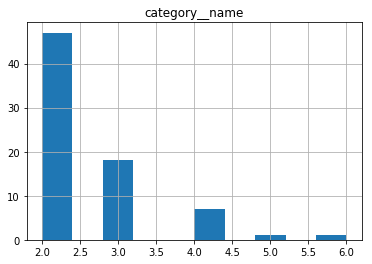

In [8]:
cat_df.groupby('id').count().hist()

In [50]:
DocCat.objects.filter(top_cat=True).update(top_cat=False)

0

In [23]:
cats = Category.objects.filter(project=q.project, level__in=[3,4])
doc_list = []
pcats = cats.filter(name__in=["Africa"])

def add_cat_list(c,d,doc_list):
    dc = DocCat.objects.get(doc=d,category=c)
    dc.top_cat=True
    dc.save()
    if d not in doc_list:
        doc_list.append(d)
    return 1


for d in docs:
    pdc = d.category.filter(project=q.project, level__in=[3,4],doccat__top_cat=True).count()
    if pdc==1:
        continue
    elif pdc==0:
        dc = d.category.filter(project=q.project, level__in=[3,4])
        if dc.count() < 1- pdc:
            print("not enough cats")
            print(d.title)
            continue
        for c in pcats:
            if c in dc:
                if pdc < 2:
                    pdc += add_cat_list(c,d,doc_list)
        dc = dc.exclude(pk__in=pcats)
        ccs = dc.filter(id__in=random.sample(set(dc.values_list('pk',flat=True)),2-pdc))
        for c in ccs:
            if pdc < 2:
                pdc += add_cat_list(c, d, doc_list)
    else:
        print("problems!")
        print(pdc)

not enough cats
Evidence and perceptions of rainfall change in Malawi: Do maize cultivar choices enhance climate change adaptation in sub-Saharan Africa?
not enough cats
Adaptation to climate change impacts: coping strategies of an indigenous community in Ghana to declining water supply
not enough cats
Effects of sowing time on agronomic characteristics and yield of quinoa
not enough cats
Effects of climate change on burn probability of forests in Daxing'anling


In [ ]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# create the file structure
xml = ET.Element('xml')
records = ET.SubElement(xml, 'records')

db_name = "APSIS - "

for d in doc_list:
    write_d_record(records, d)
    
fname = f"APSIS - all - {now}.xml"
with open(fname,"w") as f:
    f.write(ET.tostring(xml).decode("utf-8"))

In [139]:
cats = Category.objects.filter(project=q.project, level__in=[3,4])
cat_dict = list(cats.values('name'))
pcats = cats.filter(name__in=["Africa"])

for c in cat_dict:
    c['doclist'] = []

def add_cat_list(c,d,cat_dict):
    dc = DocCat.objects.get(doc=d,category=c)
    dc.top_cat=True
    dc.save()
    for cat in cat_dict:
        if cat['name']==c.name:
            cat['doclist'].append(d.id)
    return 1


for d in docs:
    pdc = d.category.filter(project=q.project, level__in=[3,4],doccat__top_cat=True).count()
    if pdc==2:
        continue
    elif pdc==0:
        dc = d.category.filter(project=q.project, level__in=[3,4])
        if dc.count() < 2- pdc:
            print("not enough cats")
            print(d.title)
            continue
        for c in pcats:
            if c in dc:
                if pdc < 2:
                    pdc += add_cat_list(c,d,cat_dict)
        dc = dc.exclude(pk__in=pcats)
        ccs = dc.filter(id__in=random.sample(set(dc.values_list('pk',flat=True)),2-pdc))
        for c in ccs:
            if pdc < 2:
                pdc += add_cat_list(c, d, cat_dict)
    else:
        print("problems!")
        print(pdc)

cat_dict

not enough cats
Evidence and perceptions of rainfall change in Malawi: Do maize cultivar choices enhance climate change adaptation in sub-Saharan Africa?
not enough cats
Adaptation to climate change impacts: coping strategies of an indigenous community in Ghana to declining water supply
not enough cats
Effects of sowing time on agronomic characteristics and yield of quinoa
not enough cats
Effects of climate change on burn probability of forests in Daxing'anling


[{'doclist': [652369, 899901], 'name': 'North America'},
 {'doclist': [47207, 746124, 778629, 799776, 1277970], 'name': 'Europe'},
 {'doclist': [40076, 1277970, 2374012],
  'name': 'Terrestrial & freshwater ecosystems'},
 {'doclist': [44683, 83426, 446695, 450276, 509759, 649460, 778629],
  'name': 'General'},
 {'doclist': [19448,
   116717,
   151419,
   151600,
   165057,
   172233,
   231841,
   251828,
   268986,
   273466,
   278918,
   296193,
   308673,
   313033,
   411658,
   446695,
   448266,
   450276,
   504549,
   509759,
   520487,
   559201,
   807809,
   1547893,
   1646564],
  'name': 'Africa'},
 {'doclist': [319250, 898298, 1298820, 1547893, 1646564],
  'name': 'Health, well-being, and communities'},
 {'doclist': [40076, 100910, 165057], 'name': 'Central & South America'},
 {'doclist': [], 'name': 'Small Island States'},
 {'doclist': [386580], 'name': 'Ocean & coastal ecosystems'},
 {'doclist': [19448,
   100910,
   116717,
   151419,
   151600,
   231841,
   251828,

In [140]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

for c in cat_dict:
    nd = len(c['doclist'])
    docs = Doc.objects.filter(pk__in=c['doclist'])
    export_en_xml(docs, f"_{c['name']}_ [{nd}] ({now}).xml")

In [132]:
for c in cat_dict:
    rpat = '_'+c["name"]+'_'
    files = [f for f in os.listdir('.') if re.match(rpat, f)]

    xml = ET.Element('xml')
    records = ET.SubElement(xml, 'records')

    days = []
    ndocs = 0
    for fname in files:
        for d in re.match('.*\((\S*)',fname).group(1).split(','):
            days.append(d)

        with open(fname,"r") as f:
            d = ET.parse(f).getroot()
            for rr in d.iter('records'):
                for r in rr.iter('record'):
                    rec = records.append(r)   
                    ndocs += 1
        os.remove(fname)

    new_fname = f'_{c["name"]}_ [{ndocs}] ({",".join(set(days))} ).xml'  
    print(new_fname)

    with open(new_fname,"w") as f:
        f.write(ET.tostring(xml).decode("utf-8"))

_North America_ [0] (2019-10-15 ).xml
_Europe_ [0] (2019-10-15 ).xml
_Terrestrial & freshwater ecosystems_ [0] (2019-10-15 ).xml
_General_ [9] (2019-10-15 ).xml
_Africa_ [75] (2019-10-15 ).xml
_Health, well-being, and communities_ [3] (2019-10-15 ).xml
_Central & South America_ [0] (2019-10-15 ).xml
_Small Island States_ [0] (2019-10-15 ).xml
_Ocean & coastal ecosystems_ [0] (2019-10-15 ).xml
_Food, fibre, and other ecosystem products_ [54] (2019-10-15 ).xml
_Australasia_ [3] (2019-10-15 ).xml
_Water quality & sanitation_ [0] (2019-10-15 ).xml
_Cities, settlements & key infrastructure_ [3] (2019-10-15 ).xml
_Poverty, livelihoods, and sustainable development_ [3] (2019-10-15 ).xml
_Asia_ [0] (2019-10-15 ).xml
_Global or NA_ [0] (2019-10-15 ).xml


In [113]:
",".join(set(days))

'2019-10-15'